In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import scipy
from scipy.fft import fft, ifft

## Define a gaussian function
$
g\left(x\right) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\tfrac{\left(x-\bar{x}\right)^2}{2\sigma^2}}
$

In [2]:
def gaussian(x, mean=0, stdev=1):
    return np.exp(-(x-mean)**2 / (2*stdev**2)) / (stdev * np.sqrt(2*np.pi))


## Define a function to construct the position representation of the wavefunction
$  \psi(x) = \int g(k) e^{i\left(kx - \omega_kt\right)} dk \\$
where, $\omega_k = \frac{\hbar k^2}{2m}$

In [3]:
def wavepacket(psi_k, xgrid, kgrid, mass=1.0, t=0, psi_x=None):
    """
    Create wavepacket for a given shape function (k-space wavefunction) psi_k, at time=t
    """
    # omega = k^2/2m
    if psi_x == None:
        psi_x = np.zeros(len(xgrid), dtype=complex)

    delta_k = abs(min(kgrid)-max(kgrid))/(len(kgrid)-1)
    for ki,k in enumerate(kgrid):
        disp = 1j*t*k*k/(2*mass)
        gk = psi_k[ki]*delta_k
        for xi,x in enumerate(xgrid): 
            psi_x[xi] += gk * np.exp(1j*k*x - disp) 
    return psi_x/(np.sqrt(2*np.pi) )

## Wavepacket at time t=0
Start off by creating a numerical grid for both position and momentum. 
Below, I normalize the $\bar{\psi(k)}$ and so the $\sigma$, is a scaled version of the standard deviation, since 
the integral of a gaussian is typically not normalized:
$$
\int  \frac{1}{\sigma\sqrt{2\pi}}e^{-\tfrac{\left(x-\bar{x}\right)^2}{2\sigma^2}} = \sqrt{2\sigma^2\pi}
$$

 AVG(k):   3.99999998
 STD(k):   0.70710660

 AVG(x):   0.00000003
 STD(x):   0.70710740


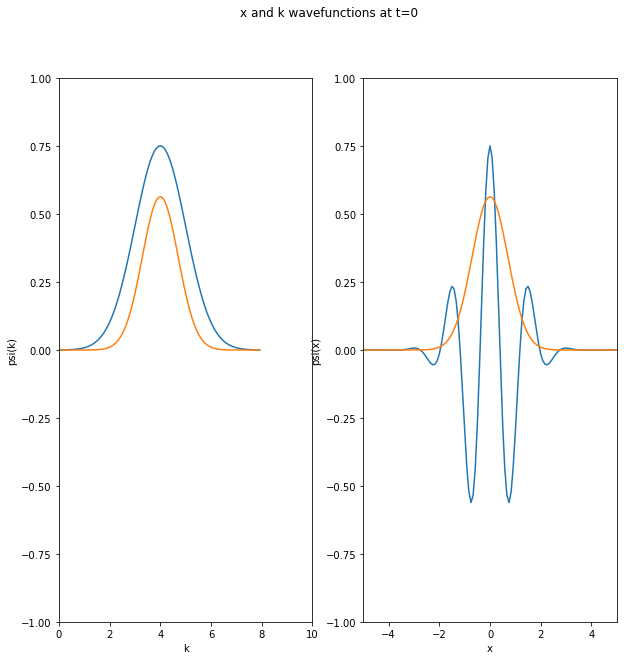

In [8]:
from IPython import display
import time

# %matplotlib notebook

mass = 10
k_std = 1
k_avg = 4

x_min = -5
x_max = 20
x_nsteps = 300

k_min = 0
k_max = 8
k_nsteps = 100

tstep = 1
t_nsteps = 50

x_grid, x_step = np.linspace(x_min, x_max, num=x_nsteps, endpoint=False, retstep=True)
k_grid, k_step = np.linspace(k_min, k_max, num=k_nsteps, endpoint=False, retstep=True)

psi_k = gaussian(k_grid, mean=k_avg, stdev=k_std)
norm_k = np.sum(psi_k.conj()*psi_k*k_step)
psi_k = psi_k / np.sqrt(norm_k)
psi_x = wavepacket(psi_k, x_grid, k_grid, t=0, mass=mass)


fig, axs = plt.subplots(1,2)
fig.suptitle('x and k wavefunctions at t=0')
axs[0].plot(k_grid, np.real(psi_k))
# axs[0].plot(k_grid, np.imag(psi_k))
axs[0].plot(k_grid, psi_k.conj()*psi_k)
axs[1].plot(x_grid, np.real(psi_x))
# axs[1].plot(x_grid, np.imag(psi_x))
axs[1].plot(x_grid, np.real(psi_x.conj()*psi_x))

axs[0].set_xlabel('k')
axs[0].set_ylabel('psi(k)')
axs[0].set_ylim([-1,1])

axs[0].set_xlim([0,10])


axs[1].set_xlabel('x')
axs[1].set_ylabel('psi(x)')
axs[1].set_ylim([-1,1])
axs[1].set_xlim([-5,5])

norm_k = np.sum(psi_k.conj()*psi_k*k_step)
norm_x = np.real(np.sum(psi_x.conj()*psi_x*x_step))

k_avg = np.sum(np.real(psi_k.conj()*psi_k)*k_grid)*k_step
k_std = np.sqrt(np.sum(np.real(psi_k.conj()*psi_k)*(k_grid-k_avg)**2)*k_step)
print(" AVG(k): %12.8f"%k_avg)
print(" STD(k): %12.8f"%k_std)

print()
x_avg = np.sum(np.real(psi_x.conj()*psi_x)*x_grid)*x_step
x_std = np.sqrt(np.sum(np.real(psi_x.conj()*psi_x)*(x_grid-x_avg)**2)*x_step)
print(" AVG(x): %12.8f"%x_avg)
print(" STD(x): %12.8f"%x_std)


## Time series
Compute the wavepacket for a range of time steps

In [9]:
y_vs_t = []
for ti in range(t_nsteps):
    y = wavepacket(psi_k, x_grid, k_grid, t=ti*tstep, mass=mass)
    y_vs_t.append(y)


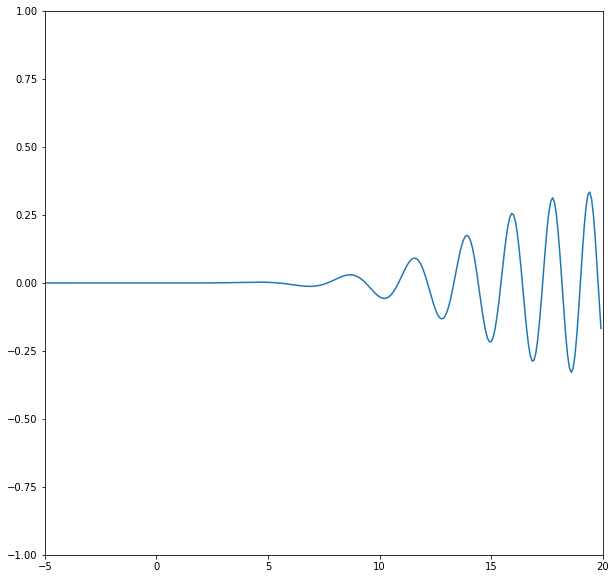

In [10]:
for y in y_vs_t:
    plt.plot(x_grid,np.real(y))
#     plt.plot(x_grid,np.imag(y))
#     plt.plot(x_grid,np.real(y.conj()*y))
    axes = plt.gca()
    axes.set_xlim([x_min,x_max])
    axes.set_ylim([-1,1])
    plt.show()
    display.clear_output(wait=True)
#     time.sleep(.001)

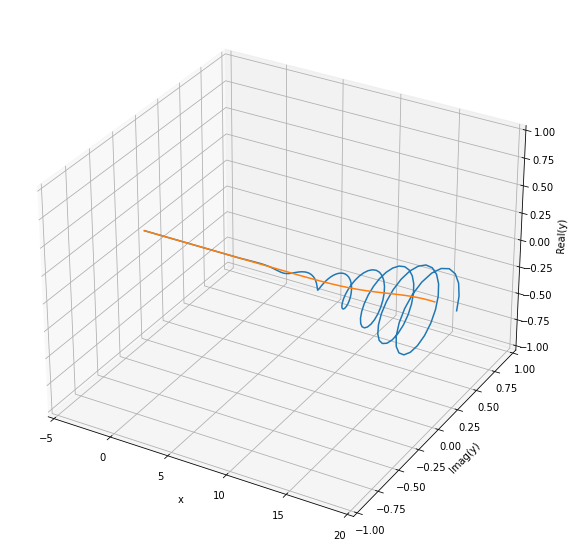

In [14]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [10, 10]

for y in y_vs_t:

#     y = y/norm
    ax = plt.axes(projection='3d')
    ax.plot3D(x_grid, np.imag(y), np.real(y));
    ax.plot3D(x_grid, np.zeros(len(y)), np.real(y.conj()*y));

    ax.set_xlabel('x')
    ax.set_ylabel('Imag(y)')
    ax.set_zlabel('Real(y)')
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])

    plt.show()
    display.clear_output(wait=True)
